# DEMO: **Time Series Similarities** with Financial Data

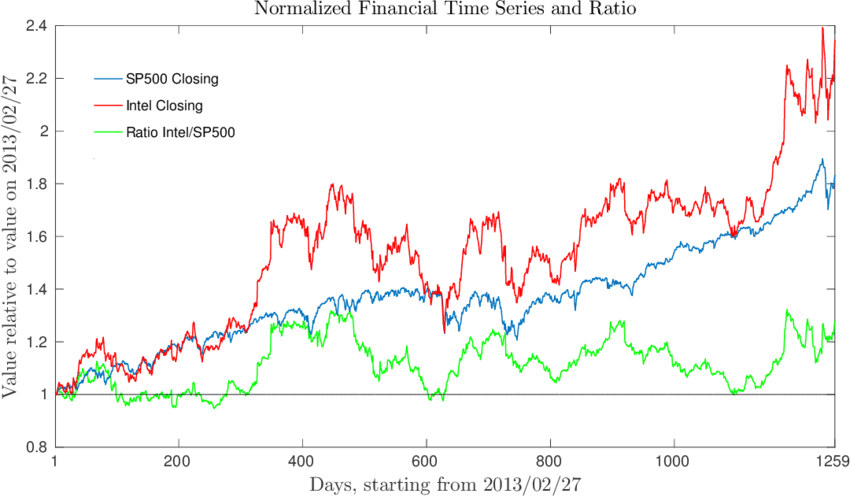

**Time-series** datasets are collections of data points that are recorded over time, such as stock prices, weather patterns, or sensor readings. In many real-world applications, it is often necessary to compare multiple time-series datasets to find similarities or differences between them.

**Similarity** search, which includes determining the degree to which similarities exist between two or more time-series data sets, is a fundamental task in time-series analysis. This is an essential phase in a variety of applications, including anomaly detection, clustering, and forecasting. In anomaly detection, for example, we may wish to find data points that differ considerably from the predicted trend. In clustering, we could wish to combine time-series data sets that have similar patterns, but in forecasting, we might want to discover the most comparable past data to reliably anticipate future trends.

In time-series analysis, there are numerous approaches for searching for similarities, including the **Euclidean distance**, **dynamic time warping (DTW)**, and shape-based methods like the **Fourier transform** and Symbolic Aggregate ApproXimation (SAX). The approach chosen is determined by the individual purpose, the scope and complexity of the data collection, and the amount of noise and outliers in the data.

<br>

---  
Source:  
+ [Similarity Search for Time-Series Data@GeeksForGeeks](https://www.geeksforgeeks.org/similarity-search-for-time-series-data/)
+ xxx
+ xxx

---  
Data ([from Yahoo Finance](https://finance.yahoo.com/)):
+ Credit Suisse Stock Market Price (April 2009 - March 2023) -- **DATA-CS.csv**
+ UBS Group Stock Market Price (April 2009 - March 2023) -- **DATA-UBS.csv**
---  

Author:
+ dr. daniel benninger  

History:  
+ April 2024, dbe   --- initial version for BINA FS24
---

## Load Libraries and Check Environment

In [ ]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("Pandas Version: ",pd.__version__)

Pandas Version:  2.0.3


## Load Financial Data and Verify Structure/Format/Values

In [ ]:
# load the financial dataset from the BINA github repositors
filePATH = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB06-Regression%2BTimeSeries/Python/"
fileNAME1 = "DATA-CS.csv"
fileNAME2 = "DATA-UBS.csv"

data1 = pd.read_csv(filePATH+fileNAME1)
data2 = pd.read_csv(filePATH+fileNAME2)

In [ ]:
data1.shape

(3524, 7)

In [ ]:
data1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-06,29.658203,30.937500,29.541016,30.703125,20.256773,3253043
1,2009-04-07,29.482422,29.960938,29.072266,29.482422,19.451399,1795584
2,2009-04-08,30.361328,30.908203,29.746094,30.644531,20.218113,1202688
3,2009-04-09,31.240234,33.027344,31.025391,32.841797,21.667789,2358579
4,2009-04-13,32.470703,34.423828,32.285156,33.974609,22.415174,1897062


In [ ]:
data2.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-06,9.86,10.16,9.71,10.02,7.549254,10109000
1,2009-04-07,9.55,9.69,9.42,9.43,7.104735,2872300
2,2009-04-08,9.74,9.76,9.46,9.58,7.217748,1683600
3,2009-04-09,10.03,10.49,9.71,10.49,7.903360,8902800
4,2009-04-13,10.15,11.10,9.98,10.86,8.182124,8083700


In [ ]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,3524.0,2.171472e+01,1.249423e+01,0.82,1.209000e+01,1.723145e+01,2.884000e+01,5.830078e+01
High,3524.0,2.190228e+01,1.260916e+01,0.86,1.219000e+01,1.744070e+01,2.899250e+01,5.867188e+01
Low,3524.0,2.150452e+01,1.235668e+01,0.82,1.202000e+01,1.712445e+01,2.862500e+01,5.750977e+01
Close,3524.0,2.170834e+01,1.249029e+01,0.85,1.209750e+01,1.730258e+01,2.882500e+01,5.843750e+01
Adj Close,3524.0,1.674580e+01,7.632176e+00,0.85,1.105146e+01,1.474290e+01,2.159492e+01,3.865160e+01
Volume,3524.0,4.267032e+06,1.254198e+07,130150.00,1.283234e+06,2.185800e+06,3.759675e+06,4.341040e+08


In [ ]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,3524.0,1.594643e+01,2.931708e+00,7.49000,1.363000e+01,1.611000e+01,1.801250e+01,2.312000e+01
High,3524.0,1.607601e+01,2.937053e+00,8.09000,1.377475e+01,1.624000e+01,1.813000e+01,2.320000e+01
Low,3524.0,1.581270e+01,2.931929e+00,7.48000,1.349375e+01,1.599500e+01,1.787000e+01,2.301000e+01
Close,3524.0,1.594933e+01,2.938603e+00,7.65000,1.366000e+01,1.614000e+01,1.801000e+01,2.320000e+01
Adj Close,3524.0,1.317635e+01,2.690787e+00,6.83436,1.111489e+01,1.312455e+01,1.491393e+01,2.216000e+01
Volume,3524.0,3.037113e+06,2.027510e+06,0.00000,1.775400e+06,2.562300e+06,3.707425e+06,4.063450e+07


## Convert date colume to **datetime** format

In [ ]:
# convert date colume to "datetime" format
data1[["Date"]] = data1[["Date"]].apply(pd.to_datetime)
data2[["Date"]] = data2[["Date"]].apply(pd.to_datetime)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3524 non-null   datetime64[ns]
 1   Open       3524 non-null   float64       
 2   High       3524 non-null   float64       
 3   Low        3524 non-null   float64       
 4   Close      3524 non-null   float64       
 5   Adj Close  3524 non-null   float64       
 6   Volume     3524 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 192.8 KB


---
## Select time range and plot time series
Select a specific (from - to) timeframe

In [ ]:
from_date = "2018-01-01"
to_date   = "2018-12-31"

In [ ]:
df1 = data1[(data1['Date'] > from_date) & (data1['Date'] < to_date)]
df2 = data2[(data2['Date'] > from_date) & (data2['Date'] < to_date)]
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2201,2018-01-02,17.879999,17.969999,17.830000,17.879999,16.313004,1090900
2202,2018-01-03,17.870001,18.120001,17.840000,18.059999,16.477228,1966000
2203,2018-01-04,18.209999,18.340000,18.200001,18.290001,16.687073,2041900
2204,2018-01-05,18.299999,18.330000,17.920000,18.100000,16.513723,2881800
2205,2018-01-08,18.120001,18.200001,18.090000,18.170000,16.577587,1771100


In [ ]:
array1 = df1['Close'].to_numpy()
array1

array([17.879999, 18.059999, 18.290001, 18.1     , 18.17    , 18.01    ,
       18.299999, 18.75    , 18.959999, 18.85    , 18.719999, 18.93    ,
       19.059999, 19.34    , 19.32    , 19.639999, 19.620001, 19.98    ,
       19.620001, 19.4     , 19.34    , 19.709999, 19.129999, 18.370001,
       18.      , 18.030001, 17.190001, 17.559999, 17.620001, 17.68    ,
       18.66    , 18.74    , 18.780001, 18.6     , 18.59    , 18.559999,
       18.719999, 18.76    , 18.74    , 18.360001, 18.059999, 17.940001,
       17.98    , 18.139999, 18.129999, 18.129999, 18.219999, 18.379999,
       18.07    , 18.030001, 18.120001, 18.25    , 18.049999, 18.059999,
       17.639999, 16.9     , 16.65    , 16.870001, 16.549999, 16.58    ,
       16.790001, 16.450001, 16.469999, 16.299999, 16.49    , 16.16    ,
       16.24    , 16.530001, 16.33    , 16.48    , 16.370001, 16.370001,
       16.459999, 16.440001, 16.59    , 16.559999, 16.540001, 16.290001,
       16.969999, 17.16    , 16.969999, 16.77    , 

In [ ]:
array2 = df2['Close'].to_numpy()
array2

array([18.5     , 18.790001, 18.950001, 18.790001, 18.879999, 18.93    ,
       19.02    , 19.299999, 19.59    , 19.42    , 19.48    , 19.85    ,
       20.16    , 20.27    , 20.440001, 20.639999, 20.620001, 20.889999,
       20.530001, 20.360001, 20.32    , 20.67    , 20.139999, 19.15    ,
       19.209999, 19.15    , 18.5     , 18.6     , 18.709999, 18.620001,
       19.1     , 19.190001, 19.209999, 19.18    , 19.24    , 19.219999,
       19.42    , 19.49    , 19.32    , 18.969999, 18.690001, 18.52    ,
       18.379999, 18.58    , 18.450001, 18.41    , 18.389999, 18.549999,
       18.23    , 18.200001, 18.389999, 18.450001, 18.27    , 18.35    ,
       18.120001, 17.34    , 17.24    , 17.620001, 17.469999, 17.59    ,
       17.66    , 17.370001, 17.280001, 17.08    , 17.309999, 17.09    ,
       17.23    , 17.440001, 17.32    , 17.530001, 17.450001, 17.52    ,
       17.51    , 17.440001, 17.65    , 17.65    , 17.129999, 16.879999,
       16.77    , 16.91    , 16.82    , 16.799999, 

---
---
  
and plot the financial time series OHLC as **candlesticks** using *plotly.graph_objects*

In [ ]:
df = df1 # CS dataset
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(
    title="Finance Institutes - Stock Market Price <br><sup>CREDIT SUISSE</sup>",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (0,60))


fig.show()

---  
# Types of **Similarity Measures**  

Time-series analysis is the process of reviewing previous data to detect patterns, trends, and anomalies and then utilizing this knowledge to forecast future trends. Similarity search, which includes determining the degree to which similarities exist among two or more time-series data sets, is an essential problem in time-series analysis.

Similarity metrics, which quantify the degree to which there is similarity or dissimilarity among two time-series data sets, are critical in this endeavor. This article will go through the several types of similarity metrics that are often employed in time-series analysis.

In [ ]:
# define two time-series data sets
time_series_A = array1  # CS dataset
time_series_B = array2  # UBS dataset

### Euclidean Distance
Euclidean distance is a distance metric that is widely used to calculate the similarity of two data points in an n-dimensional space. The Euclidean distance is used in time-series analysis to determine the degree of similarity between two time-series data sets with the same amount of observations. This distance metric is sensitive to noise and outliers, and it may not be effective in capturing shape-based similarities.

The Euclidean distance between two places $A(x_1, y_1)$ and $B(x_2, y_2)$ is calculated as the square root of the sum of the squared differences between the corresponding dimensions of the two data points.

$ d(A,B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $

The Euclidean distance between two time-series data sets with the same number of observations is determined in the context of time-series analysis. The distance between the respective data points is determined at each time point, and the distances are then added together over time to give the overall distance between the two time-series data sets.

##### **Code for calculating the Euclidean Distance between two time-series data sets**

In [ ]:
# compute the EUCLIDEAN distance between two time-series data sets
def euclidean_distance(A, B):
    dist = np.sqrt(np.sum((A - B)**2))

    return dist

In [ ]:
# calculate the Euclidean distance using the formula
euclidean_distance_AB = euclidean_distance(time_series_A,time_series_B)

print("Euclidean distance between two time-series is:", euclidean_distance_AB)

Euclidean distance between two time-series is: 12.975141757225584


---  
### Dynamic Time Warping (DTW)

**Dynamic Time Warping** (DTW) is a prominent similarity metric in time-series analysis, particularly when the data sets are of varying durations or exhibit phase changes or time warping. DTW, unlike Euclidean distance, allows for non-linear warping of the time axis to suit analogous patterns in time-series data sets. DTW is commonly used in speech recognition, signal processing, and finance.

DTW is a technique for discovering the optimum alignment between two time-series data sets by estimating the cumulative distance between each pair of related data points and calculating the shortest distance path through the cumulative distance matrix. The generated least distance path represents the optimal alignment.



In [ ]:
# compute the DTW distance between two time-series data sets
def dtw_distance(A, B):
    n = len(A)
    m = len(B)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(1, n+1):
        for j in range(1, m+1):
            # Computing the cost by using the above mathematical formula &
            # Finding the absolute difference between two values
            cost = abs(A[i-1] - B[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],
                                          dtw_matrix[i, j-1],
                                          dtw_matrix[i-1, j-1])
    return dtw_matrix[n, m]

In [ ]:
dtw_distance_AB = dtw_distance(time_series_A, time_series_B)

print("Dynamic Time Warping (DTW) distance :",dtw_distance_AB)

Dynamic Time Warping (DTW) distance : 78.76999999999998


---
### Cosine Similarity

**Cosine similarity** is a measure of how similar two non-zero vectors in an inner product space are. The cosine similarity between two data sets is obtained in time-series analysis by considering each data set as a vector and computing the cosine of the angle between the two vectors.

Cosine similarity is often employed in text mining and information retrieval applications, but it may also be useful for identifying shape-based similarities in time-series research.

Cosine similarity is the cosine of the angle between two vectors, which ranges from -1 (completely dissimilar) to 1 (completely similar).

The following is the mathematical formula for cosine similarity between two vectors x and y:

$cosine_{similarity}(x, y) = (x * y) / (||x|| * ||y||)$

where ‘*’ denotes the dot product of two vectors and ||x|| and ||y|| denote the Euclidean norms of x and y, respectively

In [ ]:
def cosine_similarity(A, B):
    # The time-series data sets should be normalized.
    A_norm = (A - np.mean(A)) / np.std(A)
    B_norm = (B - np.mean(B)) / np.std(B)

    # Determining the dot product of the normalized time series data sets.
    dot_product = np.dot(A_norm, B_norm)

    # Determining the Euclidean norm for each normalized time-series data collection.
    norm_A = np.linalg.norm(A_norm)
    norm_B = np.linalg.norm(B_norm)

    # Calculate the cosine similarity of the normalized time series data
    # using the dot product and Euclidean norms. setse-series data set
    cosine_sim = dot_product / (norm_A * norm_B)

    return cosine_sim

In [ ]:
cosine_similarity_AB = cosine_similarity(time_series_A, time_series_B)

print("cosine Similarity:",cosine_similarity_AB)

cosine Similarity: 0.9727163447195085


---
# Visualize Time Series and Similarity Measures

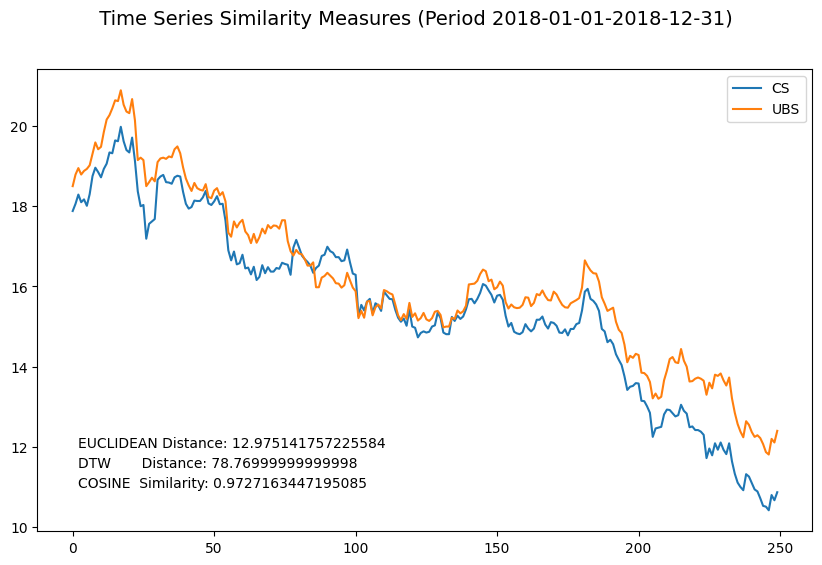

In [ ]:
# create line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.suptitle(' Time Series Similarity Measures (Period '+ str(from_date) + '-' + str(to_date)+')', fontsize=14)

plt.plot(time_series_A, label = "CS", linestyle="-")
plt.plot(time_series_B, label = "UBS", linestyle="-")

#adding text inside the plot
plt.text(2, 12,   'EUCLIDEAN Distance: '+str(euclidean_distance_AB), fontsize = 10)
plt.text(2, 11.5, 'DTW       Distance: '+str(dtw_distance_AB),       fontsize = 10)
plt.text(2, 11,   'COSINE  Similarity: '+str(cosine_similarity_AB),  fontsize = 10)

plt.legend()
plt.savefig('TS-Similarity-Measures-'+str(from_date)+'.png')
plt.show()

---
# APPENDIX

## **Applications** of Similarity Search in Time Series Analysis

Time-series analysis makes extensive use of similarity search tools. Following are some applications for similarity search:

+ Anomaly detection: With time-series data, a similarity search may be used to find odd or aberrant patterns. It is feasible to find variations that may suggest an anomaly by comparing a new time series to a collection of reference time series. In the context of network security, for example, a similarity search can be used to discover unusual traffic patterns that may suggest a cyber assault.
+ Clustering: Similarity search may also be used to group comparable patterns in time series data. It is feasible to group people with similar features by comparing the similarity of each pair of time series. This can be beneficial for detecting trends in enormous datasets, such as financial or medical data analysis.
+ Forecasting: Similarity search may be used to find patterns in past time series data that can be used to predict future values. By comparing the similarity of a new time series to past data, trends, and patterns that may be utilized for forecasting can be identified. This may be beneficial in a variety of fields, including banking, weather forecasting, and energy use.
Ultimately, similarity search approaches have a wide variety of applications in time-series research, and they may be used to increase the accuracy and efficiency of various data analysis activities.

## **Challenges** in Similarity Search

+ Managing Missing Data: Missing values in time series data are common owing to a variety of factors such as sensor failures or data transmission issues. Missing data might impair similarity search results and make proper time-series data comparison difficult. As a result, efficient approaches for dealing with missing data are necessary.
+ Managing vast and complicated data sets: Time-series data can be big and complicated, making typical methods difficult to handle and compare. Large data sets need effective indexing and search algorithms capable of swiftly identifying pertinent data pieces.
+ Managing Time Shifts: Temporal shifts in time-series data can occur for a variety of reasons, including time zone variations or changes in data collecting periods. It is critical for reliable similarity search results to detect and rectify temporal shifts.
+ High-resolution scaling: Time-series data might have many dimensions, making it difficult to look for comparable patterns in high-dimensional space. Traditional methods’ performance can decline quickly as the number of dimensions rises, making it difficult to handle high-dimensional data.
+ Choosing the Best Similarity Measures: The accuracy of the similarity search results is affected by the choice of a suitable similarity measure in time-series analysis. Various similarity metrics are appropriate for different types of data, and choosing the proper one is critical for producing accurate and useful findings.

In summary, similarity search in time-series analysis has various problems that must be overcome to produce reliable and efficient findings. Some of the primary obstacles that must be solved to achieve successful similarity search in time-series research are effective management of missing data, dealing with vast and complicated data sets, selecting appropriate similarity measures, scaling to high dimensions, and addressing temporal changes.